<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/BEDU-Santander-2021/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 4: Regresión Lineal

### Correlaciones

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
arr_1 = pd.Series([1,2,3,4,5,6,7,8,9,10])
arr_2 = pd.Series([10,9,8,7,6,5,4,3,2,1])

La correlación de la primera serie con la segunda es: -0.9999999999999999


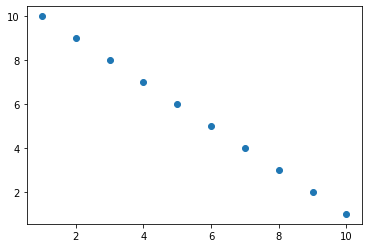

In [15]:
#Graficamos la correlacion y la imprimirmos
plt.scatter(arr_1,arr_2); #Coeficiente de pearson
print(f'La correlación de la primera serie con la segunda es: {arr_1.corr(arr_2)}')

In [ ]:
#Ejercicio
df_1 = pd.read_csv('')

#### Mapas de calor para obervar la correlacion de todas mis variables

In [18]:
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df_filtered = df.drop(columns = ['outcome']) 
df_filtered.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


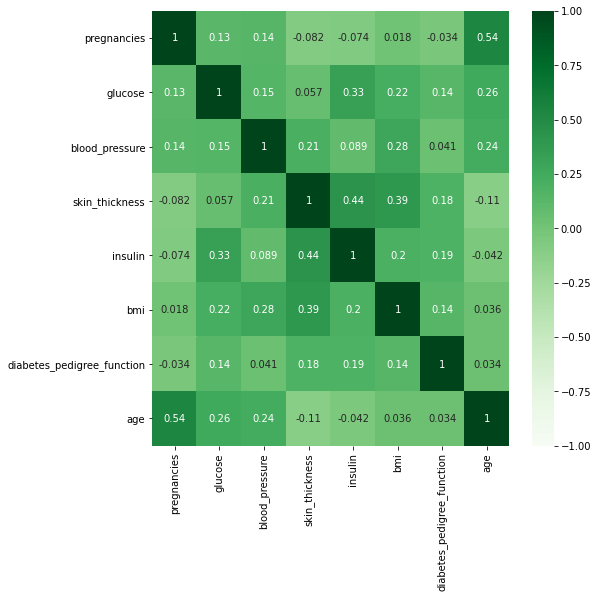

In [32]:
#Graficamos heat map o mapa de calor
plt.figure(figsize = (8,8))  #Opcional para tamaño del mapa
# Le metemos valor minimo y maximo, con annot nos muestra los datos(anotaciones) y con cmap los colores del mapa
sns.heatmap(df_filtered.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'Greens'); 

#### Ejercicio

In [37]:
wine = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto wine_quality_red-clean.csv', index_col= 0)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


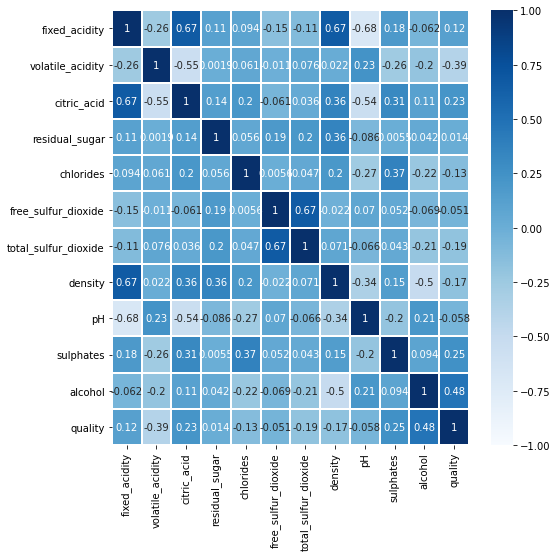

In [61]:
plt.figure(figsize= (8,8))
sns.heatmap(wine.corr(), vmin = -1, vmax = 1, cmap = 'Blues', annot = True, linewidths= 1);

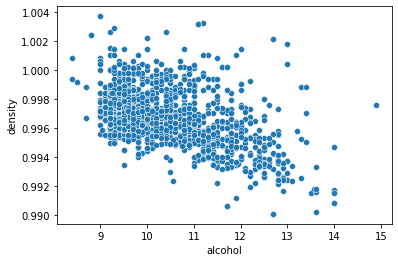

In [63]:
# Veamos correlacion con alcohol y densidad
sns.scatterplot( x= wine['alcohol'], y = wine['density']);

In [64]:
#Regresamos a trabajar con el dataset de diabetes
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


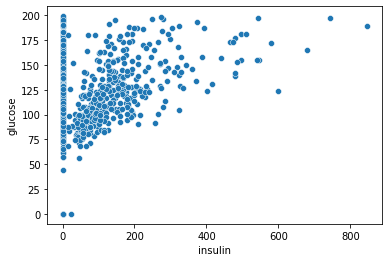

In [69]:
# Insulina contra glucos
sns.scatterplot(x = df['insulin'], y = df['glucose']);

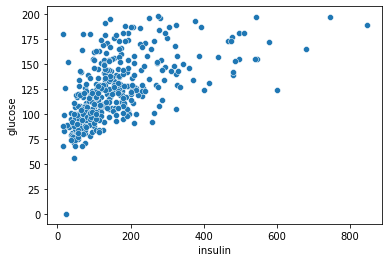

In [71]:
# Con insulina mayor a cer
df_no_zero = df[df['insulin'] > 0]
sns.scatterplot(x = df_no_zero['insulin'], y = df['glucose']);

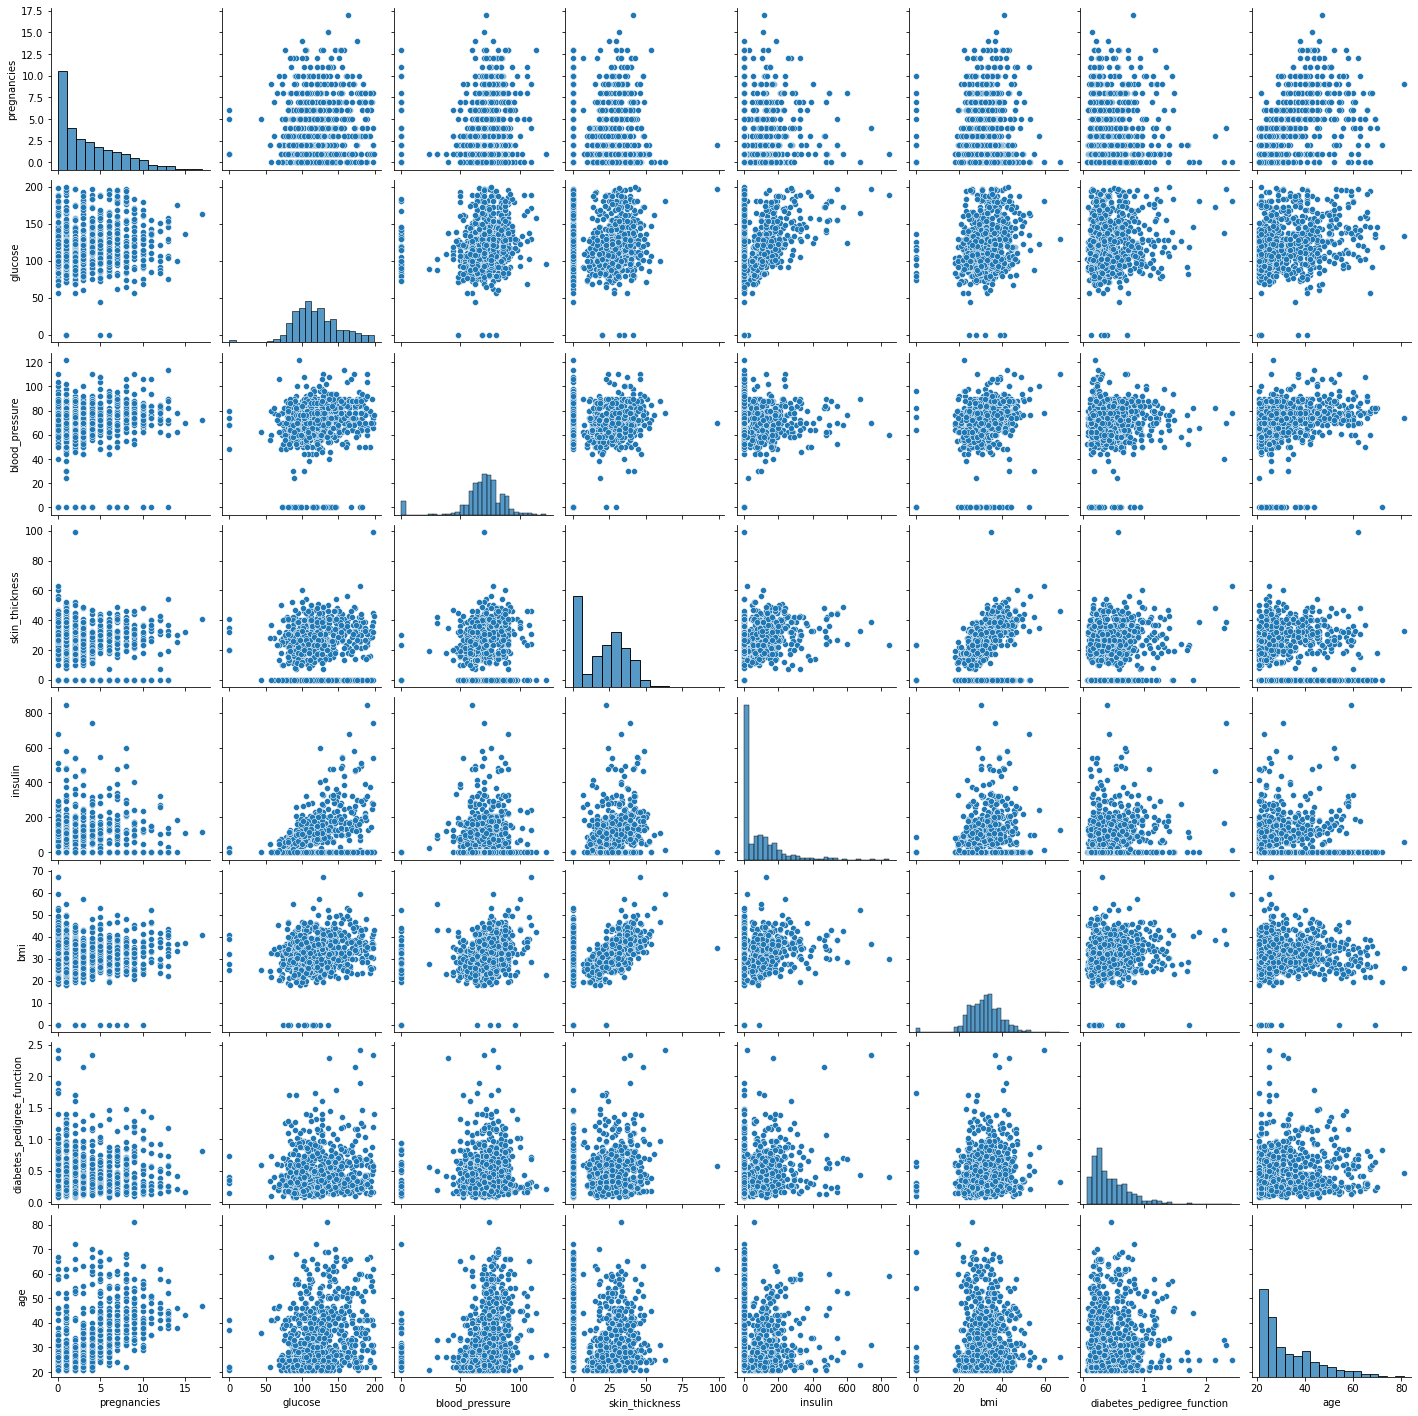

In [72]:
# Nos permite graficar todas las correlaciones comparativamente
sns.pairplot(df_filtered)

## Regresión Lineal
### Usando Scikit Learn

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression #Objeto porque empieza con mayusculas y estan pegadas las palabras

0.8849529343548095

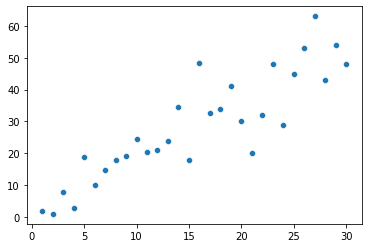

In [75]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48])

sns.scatterplot(x = serie_1, y = serie_2);
serie_1.corr(serie_2)

# Creamos una instancia del objeto (minusculas)
# Fit
# Predict


In [77]:
linear = LinearRegression() #Instancia

#Para datos de Fit le pasamos un df en x (datos de salida) #aqui estima todas las rectas posibles y ajusta a la mejor
linear.fit(serie_1.to_frame(), serie_2) 

#Predict 
y_predict = linear.predict(serie_1.to_frame())


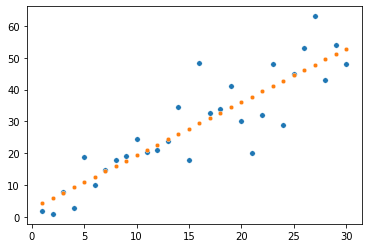

In [80]:
sns.scatterplot(x = serie_1, y = serie_2, s = 30)
sns.scatterplot(x = serie_1, y = y_predict, s = 20) #le metemos la recta

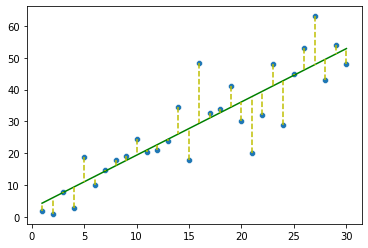

In [86]:
sns.scatterplot(x = serie_1, y = serie_2)
sns.lineplot(x = serie_1, y = y_predict, color = 'g');

#Generamos las distancias con la prediccion
for i in range(len(serie_1)):
  plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'y--') # el ultimo argumento es el estilo de las distancias



In [95]:
# Coeficiente de determinación o R-square. R2
#Recordar que la var indep siempre nos la pide como df
linear.score(serie_1.to_frame(), serie_2)

0.7831416960231878

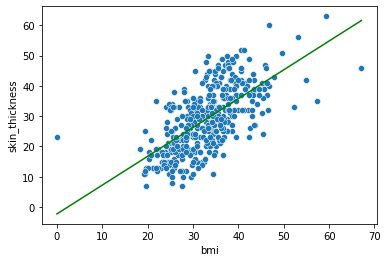

In [101]:
linear_2 = LinearRegression()
linear_2.fit(df_no_zero['bmi'].to_frame(),df_no_zero['skin_thickness'])
y_predict = linear_2.predict(df_no_zero['bmi'].to_frame())

sns.scatterplot( x = df_no_zero['bmi'], y = df_no_zero['skin_thickness'])
sns.lineplot(x = df_no_zero['bmi'], y = y_predict, color = 'g');

In [102]:
#EJERCICIO
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#sns.pairplot(wine)

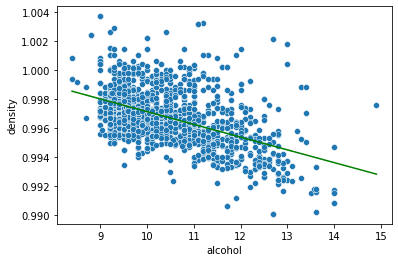

In [107]:
#Alcohol y densidad
linear_1 = LinearRegression()
linear_1.fit(wine['alcohol'].to_frame(), wine['density'])
y_predict = linear_1.predict(wine['alcohol'].to_frame())

sns.scatterplot( x = wine['alcohol'], y = wine['density'])
sns.lineplot(x = wine['alcohol'], y = y_predict, color = 'g');

In [109]:
linear_1.score(wine['alcohol'].to_frame(), wine['density'])

0.2461943643971065

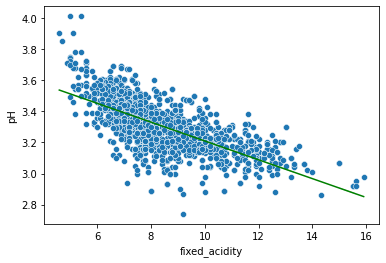

In [111]:
linear_1 = LinearRegression()
linear_1.fit(wine['fixed_acidity'].to_frame(), wine['pH'])
y_predict = linear_1.predict(wine['fixed_acidity'].to_frame())

sns.scatterplot( x = wine['fixed_acidity'], y = wine['pH'])
sns.lineplot(x = wine['fixed_acidity'], y = y_predict, color = 'g');

In [112]:
linear_1.score(wine['fixed_acidity'].to_frame(), wine['pH'])

0.4664592142560905